In [1]:
import pandas as pd
import numpy as np
import pandas.api.types as pand
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d


In [2]:
risk = pd.read_excel('1702231451658_Risques.xlsx',sheet_name = 'Risques_net')
risk

,CLE_RISQ,NUM_SOC,NUM_CONT,DAT_DEB,DAT_FIN,SEXE,MARQUE,CD_USAG,COEF,ZONE,...,GAR_BDG,GAR_VOL,GAR_DOM,NB_RISQ,COTIS_BDG,COTIS_VOL,COTIS_DOM,PUIS_DIN,datfin-datdeb,Unnamed: 21
0,101001,1,1,2013-01-01,2014-01-01,M,CITROEN,PRI,50,5,...,BDG,VOL,DOM,1.000000,16.87,20.06,196.29,75,365,0.0
1,201001,2,1,2013-01-01,2014-01-01,M,RENAULT,PRI,50,5,...,BDG,VOL,DOM,1.000000,25.50,40.61,278.93,110,365,NaN
2,303001,3,3,2013-01-01,2014-01-01,M,RENAULT,PRI,50,5,...,BDG,VOL,DOM,1.000000,31.80,26.77,161.88,55,365,NaN
3,402001,4,2,2013-01-01,2014-01-01,F,RENAULT,PRI,50,2,...,BDG,VOL,DOM,1.000000,30.96,59.17,161.43,95,365,NaN
4,501001,5,1,2013-01-01,2014-01-01,M,RENAULT,PRI,50,0,...,BDG,VOL,DOM,1.000000,42.30,45.99,320.87,110,365,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,1276101001,12761,1,2013-12-21,2014-01-01,F,VOLKSWAG,PRI,64,1,...,BDG,NaN,NaN,0.030137,1.99,0.00,0.00,90,11,NaN
18732,1276201001,12762,1,2013-12-26,2014-01-01,F,PEUGEOT,DTT,50,7,...,BDG,VOL,DOM,0.016438,0.58,0.73,4.74,70,6,NaN
18733,1276301001,12763,1,2013-12-26,2014-01-01,F,HYUNDAI,DTT,65,6,...,BDG,VOL,DOM,0.016438,0.88,0.70,3.87,75,6,NaN
18734,1276401001,12764,1,2013-12-26,2014-01-01,F,PEUGEOT,DTT,100,3,...,BDG,NaN,NaN,0.016438,1.35,0.00,0.00,58,6,NaN


In [30]:
#question 1
def supcol(i):
    global risk
    col = risk.columns
    if i in range(0,21):
        rep = input("ëtes Vous sûr de vouloir supprimer la colonne ? Oui/Non")
        if rep == "oui":
            risk = risk.drop(columns = col[i],axis = 1)
            print("suppression reussie")
        else:
                print("Suppression annulee")
    else:
        print('Valeur invalide, le maximum de colonnes est de 20')
   

In [4]:
risk.columns

Index(['CLE_RISQ', 'NUM_SOC', 'NUM_CONT', 'DAT_DEB', 'DAT_FIN', 'SEXE',
       'MARQUE', 'CD_USAG', 'COEF', 'ZONE', 'GROUPE_sra', 'CLASSE_Sra',
       'GAR_BDG', 'GAR_VOL', 'GAR_DOM', 'NB_RISQ', 'COTIS_BDG', 'COTIS_VOL',
       'COTIS_DOM', 'PUIS_DIN', 'datfin-datdeb', 'Unnamed: 21'],
      dtype='object')

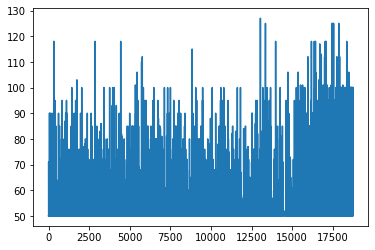

In [6]:
#question 2
def valcol(n):
    x = np.arange(0,len(risk[n]))
    plt.plot(x,risk[n])
    plt.show()
valcol('COEF')

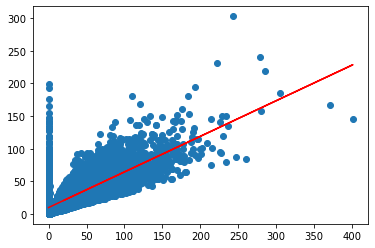

In [9]:
#question 3
def visual():
    # calculer les coeffs de la regression 
    a,b  = np.polyfit(risk['COTIS_VOL'],risk['COTIS_BDG'],1)
    
    plt.plot(risk['COTIS_VOL'],risk['COTIS_BDG'],'o')
    # tracer la droite de regression
    plt.plot(risk['COTIS_VOL'],a*risk['COTIS_VOL']+ b,'r')
    plt.show()

visual()

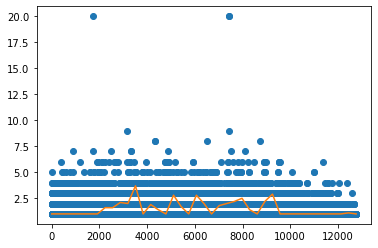

In [10]:
#question 4
def interp(n1,n2):
    
        
        if risk[risk.columns[n1]].dtypes != object and risk[risk.columns[n2]].dtypes != object and pand.is_datetime64_any_dtype(risk[risk.columns[n1]]) == False and pand.is_datetime64_any_dtype(risk[risk.columns[n2]]) == False:
                x = risk[risk.columns[n1]]
                y = risk[risk.columns[n2]]
                f = interp1d(x, y)
                xnew = np.linspace(x.min(), x.max(), num=41, endpoint=True)
                plt.plot(x, y, 'o', xnew, f(xnew),'-')
                plt.show()
        
        else:
            print("Les deux colonnes doivent etre de type numerique")
            
interp(1,2)

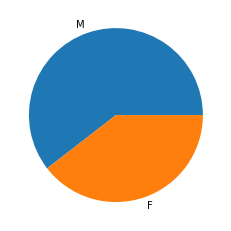

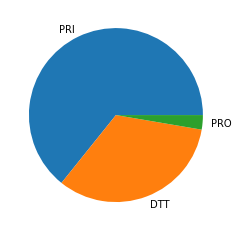

(None, None)

In [14]:
#question 5
def statcol(i):
    if risk[risk.columns[i]].dtypes != object  and pand.is_datetime64_any_dtype(risk[risk.columns[i]]) == False:
        plt.boxplot(risk[risk.columns[i]])
        plt.show()
    elif risk[risk.columns[i]].dtypes == object:
        if risk[risk.columns[i]].isnull().sum() == 0: # on verifie s'il y'a une valeur manquante dans la colonne
                plt.pie(risk[risk.columns[i]].value_counts(), labels = risk[risk.columns[i]].unique())
                plt.show()
        else:
            plt.pie(risk[risk.columns[i]].value_counts(), labels = risk[risk.columns[i]].unique()[:-1])
            plt.show()
    else:
        print('entrer une colonne numerique ou categorielle')
statcol(5), statcol(7)

In [21]:

#question 6
def stat(x):
    if x in risk["MARQUE"].unique():
        data = { "Moyenne":[risk[risk['MARQUE']==x]['COTIS_BDG'].mean(),risk[risk['MARQUE']==x]['COTIS_VOL'].mean(),risk[risk['MARQUE']==x]['COTIS_DOM'].mean()], 
           
           "Ecart-type":[risk[ risk['MARQUE']==x]['COTIS_BDG'].std(),risk[risk['MARQUE']==x]['COTIS_VOL'].std(),risk[risk['MARQUE']==x]['COTIS_DOM'].std() ]       
           }
        df = pd.DataFrame(data, index = ["COTIS_BDG","COTIS_VOL","COTIS_DOM"])
    else:
        df = "marque de vehicule incorrect"
    
    print(df)    

In [3]:
#question 7

''''def affiche1():
        COTIS_BDG_M = risk.loc[risk["SEXE"] == "M", "COTIS_BDG"]
        COTIS_VOL_M = risk.loc[risk["SEXE"] == "M", "COTIS_VOL"]
        COTIS_DOM_M = risk.loc[risk["SEXE"] == "M", "COTIS_DOM"]
        M = [sum(COTIS_BDG_M), sum(COTIS_VOL_M), sum(COTIS_DOM_M)]
        
        COTIS_BDG_F = risk.loc[risk["SEXE"] == "F", "COTIS_BDG"]
        COTIS_VOL_F = risk.loc[risk["SEXE"] == "F", "COTIS_VOL"]
        COTIS_DOM_F = risk.loc[risk["SEXE"] == "F", "COTIS_DOM"]
        F = [sum(COTIS_BDG_F), sum(COTIS_VOL_F), sum(COTIS_DOM_F)]
        valeurs = ["COTIS_BDG", "COTIS_VOL", "COTIS_DOM"]
        x = np.arange(3)
        fig, ax = plt.subplots()
        ax.bar(x,M,width = 0.25,color = 'indigo')
        ax.bar(x+0.25,F,width = 0.25,color = 'grey')
        ax.set_xticks(x+0.125)
        ax.set_xticklabels(valeurs)
        plt.legend(["Hommes", "Femmes"])
        plt.show()

C:\Users\sohfr\AppData\Local\Temp/ipykernel_107568/2691891035.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r = risk.groupby('SEXE')['COTIS_VOL','COTIS_DOM','COTIS_BDG'].sum()


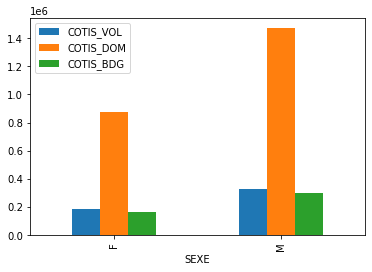

In [167]:
def affiche1():    
    r = risk.groupby('SEXE')['COTIS_VOL','COTIS_DOM','COTIS_BDG'].sum()
    r.plot(kind = 'bar')
    plt.show()

In [8]:
#question 8
''''def affiche2():
    jan = [risk.loc[risk["DAT_DEB"].dt.month == 1, "COTIS_BDG"].sum() , risk.loc[risk["DAT_DEB"].dt.month == 1, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 1, "COTIS_DOM"].sum() ]
    feb = [risk.loc[risk["DAT_DEB"].dt.month == 2, "COTIS_BDG"].sum() , risk.loc[risk["DAT_DEB"].dt.month == 2, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 2, "COTIS_DOM"].sum() ]
    mars= [risk.loc[risk["DAT_DEB"].dt.month == 3, "COTIS_BDG"].sum() , risk.loc[risk["DAT_DEB"].dt.month == 3, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 3, "COTIS_DOM"].sum() ]
    avril = [risk.loc[risk["DAT_DEB"].dt.month == 4, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 4, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 4, "COTIS_DOM"].sum() ]
    mai = [risk.loc[risk["DAT_DEB"].dt.month == 5, "COTIS_BDG"].sum(),  risk.loc[risk["DAT_DEB"].dt.month == 5, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 5, "COTIS_DOM"].sum() ]
    juin = [risk.loc[risk["DAT_DEB"].dt.month == 6, "COTIS_BDG"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 6, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 6, "COTIS_DOM"].sum() ]
    juill = [risk.loc[risk["DAT_DEB"].dt.month == 7, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 7, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 7, "COTIS_DOM"].sum() ]
    aout = [risk.loc[risk["DAT_DEB"].dt.month == 8, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 8, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 8, "COTIS_DOM"].sum() ]
    sept = [risk.loc[risk["DAT_DEB"].dt.month == 9, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 9, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 9, "COTIS_DOM"].sum() ]
    octo = [risk.loc[risk["DAT_DEB"].dt.month == 10, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 10, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 10, "COTIS_DOM"].sum() ]
    nov = [risk.loc[risk["DAT_DEB"].dt.month == 11, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 11, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 11, "COTIS_DOM"].sum() ]
    dec = [risk.loc[risk["DAT_DEB"].dt.month == 12, "COTIS_BDG"].sum(),risk.loc[risk["DAT_DEB"].dt.month == 12, "COTIS_VOL"].sum(), risk.loc[risk["DAT_DEB"].dt.month == 12, "COTIS_DOM"].sum() ]
    
    
    valeurs = ["COTIS_BDG", "COTIS_VOL", "COTIS_DOM"]
    x = np.arange(0,5,2)
    fig, ax = plt.subplots()
    ax.bar(x,jan,width = 0.15,color = 'indigo')
    ax.bar(x+0.15,feb,width = 0.15,color = 'grey')
    ax.bar(x+0.30,mars,width = 0.15,color = 'cyan')
    ax.bar(x+0.45,avril,width = 0.15,color = 'fuchsia')
    ax.bar(x+0.60,mai,width = 0.15,color = 'gold')
    ax.bar(x+0.75,juin,width = 0.15,color = 'green')
    ax.bar(x+0.90,juill,width = 0.15,color = 'coral')
    ax.bar(x+1.05,aout,width = 0.15,color = 'aqua')
    ax.bar(x+1.2,sept,width = 0.15,color = 'bisque')
    ax.bar(x+1.35,octo,width = 0.15,color = 'brown')
    ax.bar(x+1.5,nov,width = 0.15,color = 'darksalmon')
    ax.bar(x+1.65,dec,width = 0.15,color = 'darkslateblue')
    ax.set_xticks(x+0.125)
    ax.set_xticklabels(valeurs)
    plt.legend(["Janvier", "Fevrier","Mars","Avril","Mai","Juin","Juillet","Aout","Sept","Oct","Nov","Dec"])
    plt.show()


In [165]:
def affiche2():
    global risk
    m = list(risk["DAT_DEB"].dt.month)
    risk = risk.assign(Mois = m)
    r = risk.groupby('Mois')['COTIS_VOL','COTIS_DOM','COTIS_BDG'].sum()
    r.plot(kind = 'bar')
    plt.show()

C:\Users\sohfr\AppData\Local\Temp/ipykernel_107568/1012930698.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r = risk.groupby('Mois')['COTIS_VOL','COTIS_DOM','COTIS_BDG'].sum()


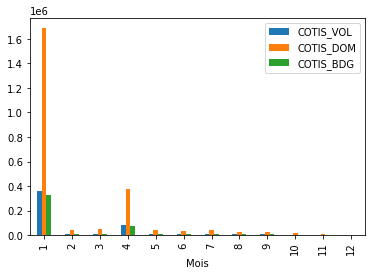

In [166]:
affiche3()

In [152]:
m = list(risk["DAT_DEB"].dt.month)
m

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 12,
 1,
 6,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 9,
 1,
 4,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 7,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 6,
 7,
 1,
 4,
 1,
 4,
 7,
 1,
 1,
 6,
 8,
 1,
 1,
 1,
 1,
 8,
 10,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 1,
 5,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 12,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 7,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 7,
 11,
 1,
 1,
 7,
 1,
 4,
 1,
 4,
 1,
 10,
 1,
 1,
 2,
 4,
 1,
 3,
 1,
 4,
 1,
 4,
 1,
 12,
 1,
 1,
 2,
 2,
 5,
 1,
 1,
 1,
 1,
 1,
 12,
 5,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 11,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 4,
 1,
 4,
 1,
 4,
 5,
 1,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 1,

In [146]:
risk = risk.assign(Mois = m)

In [150]:
r = risk.groupby('Mois')['COTIS_VOL','COTIS_DOM','COTIS_BDG'].sum()
r

C:\Users\sohfr\AppData\Local\Temp/ipykernel_107568/1086530474.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r = risk.groupby('Mois')['COTIS_VOL','COTIS_DOM','COTIS_BDG'].sum()


,COTIS_VOL,COTIS_DOM,COTIS_BDG
Mois,,,
1,360182.19,1689412.91,323437.05
2,9707.43,41879.90,9786.43
3,11596.08,45388.03,10758.93
4,81202.28,376824.76,72597.44
5,8818.51,39699.19,9060.99
6,8336.55,34812.64,8485.28
7,9802.13,41423.70,8728.19
8,5911.65,24946.82,5789.18
9,5404.22,24371.66,5591.35


<AxesSubplot:xlabel='Mois'>

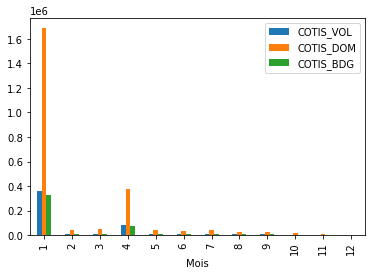

In [151]:
r.plot(kind = 'bar')

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

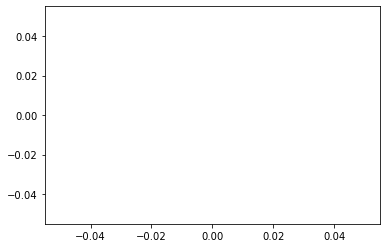

In [154]:
help(plt.plot())